In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from operator import itemgetter
from collections import Counter

## Pre-processing

In [55]:
def preprocessing(filename):
    tokenized_sentences = []
    with open(filename, encoding="utf-8") as f:
        for line in f:
            # Remove non-alphabetical characters
            line = ''.join(e for e in line if e.isalpha() or e == ' ')
            
            # Apply white-space tokenization
            line = line.split()  
            
            # Uppercase to lowercase
            line = [word.lower() for word in line]
            
            tokenized_sentences += line
    return tokenized_sentences

corpus = preprocessing('corpora/Ghandi.txt')
print(corpus)

['mohandas', 'karamchand', 'gandhi', 'october', 'january', 'was', 'an', 'indian', 'activist', 'who', 'was', 'the', 'leader', 'of', 'the', 'indian', 'independence', 'movement', 'against', 'british', 'colonial', 'rule', 'employing', 'nonviolent', 'civil', 'disobedience', 'gandhi', 'led', 'india', 'to', 'independence', 'and', 'inspired', 'movements', 'for', 'civil', 'rights', 'and', 'freedom', 'across', 'the', 'world', 'the', 'honorific', 'mahātmā', 'sanskrit', 'highsouled', 'venerable', 'was', 'applied', 'to', 'him', 'first', 'in', 'in', 'south', 'africa', 'and', 'is', 'now', 'used', 'worldwide', 'in', 'india', 'he', 'was', 'also', 'called', 'bapu', 'a', 'term', 'that', 'he', 'preferred', 'gujarati', 'endearment', 'for', 'father', 'papa', 'and', 'gandhi', 'ji', 'and', 'is', 'known', 'as', 'the', 'father', 'of', 'the', 'nation', 'born', 'and', 'raised', 'in', 'a', 'hindu', 'family', 'in', 'coastal', 'gujarat', 'western', 'india', 'and', 'trained', 'in', 'law', 'at', 'the', 'inner', 'templ

## Frequency & Rank

In [56]:
# Counter() is ook een optie

frequency = {}

for word in corpus:
    frequency[word] = frequency.get(word, 0) + 1

# Table with rank & frequency
rank = 1
column_header = ['Rank', 'Frequency']
df = pd.DataFrame(columns = column_header)
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

for word, freq in collection:
    df.loc[word] = [rank, freq]
    rank = rank + 1
    
print(df)

               Rank Frequency
the               1      1050
and               2       688
of                3       564
to                4       562
in                5       522
...             ...       ...
tarun          3980         1
authored       3981         1
authoritative  3982         1
grandfather    3983         1
taught         3984         1

[3984 rows x 2 columns]


## Zipf's Law

In [49]:
def zipf(most_freq, r):
    return most_freq * (1/r)

max_freq = collection[0][1]
est_rank = []  
    
for r in range(len(collection)):
    r += 1
    est_rank.append(zipf(most_freq, r))

## Plotting Distribution

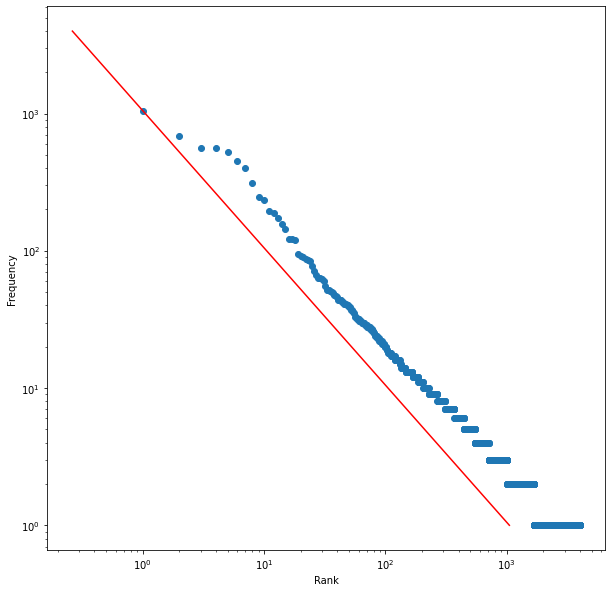

In [50]:
plt.figure(figsize=(10,10))  
plt.ylabel("Frequency")
plt.xlabel("Rank")

x_axis = np.linspace(1, rank-1, rank-1)
y_axis = []

for _, freq in collection:
    y_axis.append(freq)
    
plt.scatter(x_axis, y_axis)
plt.plot(estimates, x_axis, color='red')
plt.xscale("log")
plt.yscale("log")
plt.show()